### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [182]:
#install.packages ("cluster")

           WATER PROTEIN  FAT LACTOSE  ASH
HORSE       90.1     2.6  1.0     6.9 0.35
ORANGUTAN   88.5     1.4  3.5     6.0 0.24
MONKEY      88.4     2.2  2.7     6.4 0.18
DONKEY      90.3     1.7  1.4     6.2 0.40
HIPPO       90.4     0.6  4.5     4.4 0.10
CAMEL       87.7     3.5  3.4     4.8 0.71
BISON       86.9     4.8  1.7     5.7 0.90
BUFFALO     82.1     5.9  7.9     4.7 0.78
GUINEA_PIG  81.9     7.4  7.2     2.7 0.85
CAT         81.6    10.1  6.3     4.4 0.75
FOX         81.6     6.6  5.9     4.9 0.93
LLAMA       86.5     3.9  3.2     5.6 0.80
MULE        90.0     2.0  1.8     5.5 0.47
PIG         82.8     7.1  5.1     3.7 1.10
ZEBRA       86.2     3.0  4.8     5.3 0.70
SHEEP       82.0     5.6  6.4     4.7 0.91
DOG         76.3     9.3  9.5     3.0 1.20
ELEPHANT    70.7     3.6 17.6     5.6 0.63
RABBIT      71.3    12.3 13.1     1.9 2.30
RAT         72.5     9.2 12.6     3.3 1.40
DEER        65.9    10.4 19.7     2.6 1.40
REINDEER    64.8    10.7 20.3     2.5 1.40
WHALE      

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

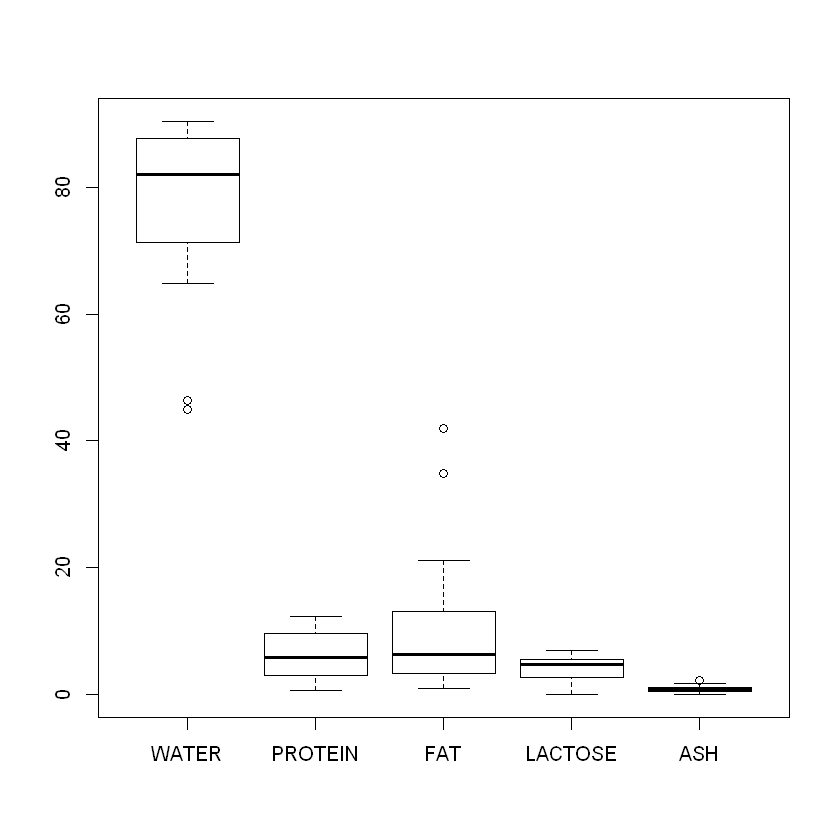

In [183]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
print(datos)
summary(datos)
boxplot(datos)

**Descripción de los datos y porque realizar un análisis de agrupamiento**

Se trata de un conjunto de datos que describen la composición de la leche de 25 mamíferos. Se consideran 5 características en porcentajes: agua, proteína, grasa, lactosa y calcio. Se puede observar del boxplot que, en promedio, el mayor porcentaje de todas las leches es agua (cerca de 80%), seguido de proteína, grasa y lactosa (cerca del 5%) y bastante menor porcentaje de calcio (0,8%). Las componente que tienen mayor variación son el porcentaje de agua y de grasa. Parece pertinente realizar un análisis de agrupamiento para distinguir grupos de mamíferos que poseen leches de características similares.

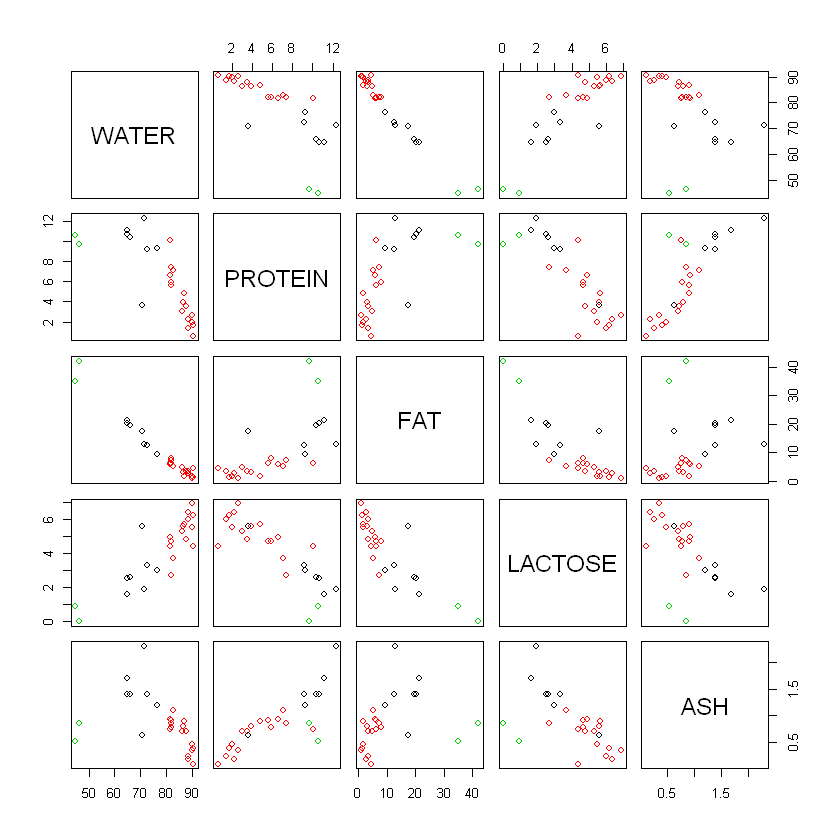

In [184]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Al considerar 3 grupos con el algoritmo KMeans, se obtienen grupos claramente diferenciados por las variables porcentaje de agua y grasa. El grupo negro (focas y delfines), con los menores porcentajes de agua y mayores porcentajes de grasa. El grupo rojo, con 6 mamíferos, cuyas leches tienen porcentajes intermedios de agua (60 a 75%) y grasa (12 a 22%). Y luego el grupo verde, el mas común, con 17 mamíferos, cuyas leches tienen mas de 75% de agua y menos de 10% de grasa. Las otras variables no permiten discriminar completamente los 3 grupos definidos.

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5 
1.96946572 0.94201777 0.35905327 0.31397620 0.07941651 

 5  variables and  25 observations.


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362
1.243827,0.0248324,0.07949783,-0.02299768,0.004865841
-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957


K-means clustering with 3 clusters of sizes 7, 16, 2

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 69.47143  9.514286 16.28571 2.928571 1.432857
2 86.06250  4.275000  4.17500 5.118750 0.635625
3 45.65000 10.150000 38.45000 0.450000 0.690000

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         2          2          2          2          2          2          2 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          2          2          2          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         2          2          1          1          1          1          1 
  REINDEER      WHALE       SEAL    DOLPHIN 
         1          1          3          3 

Within cluster sum of squares by cluster:
[1] 299.9911 377.2215  27.1912
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

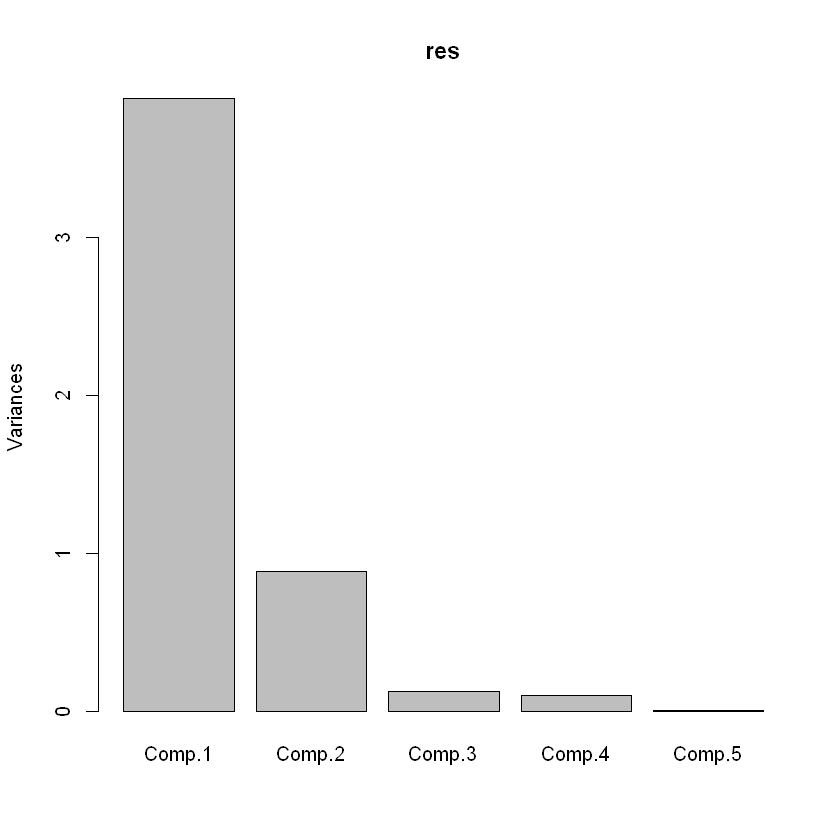

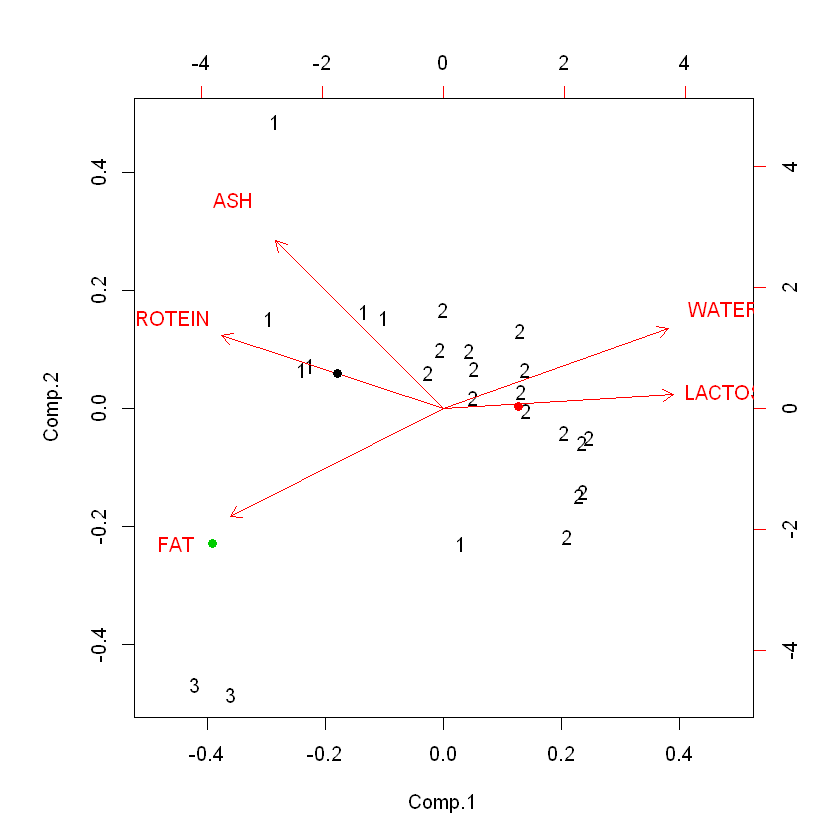

In [185]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


La representación de los grupos en el primer plano principal nos permite distinguir que el grupo 3 representa a los individuos con mayores valores de FAT, mientras corresponde a los mamíferos con mayores porcentajes de agua y lactosa y por otra parte el grupo 2 contiene mamíferos con mayores porcentajes de proteína y calcio (a excepción de un caso).

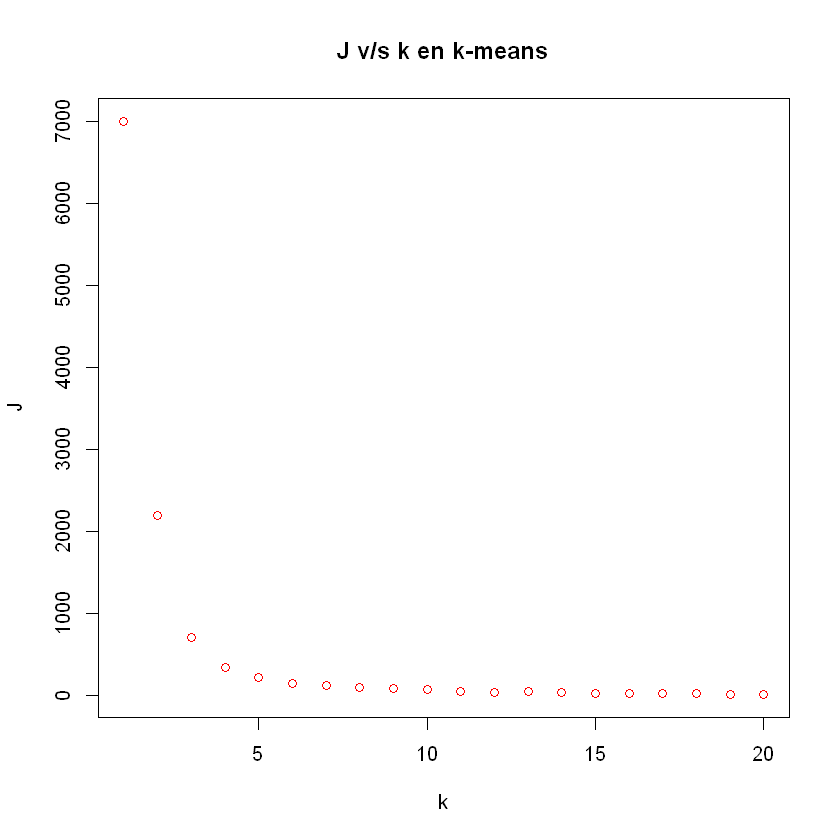

In [187]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

### ------- -------- ------- ------- ------- 

**Ejercicio 1:** 
1. De acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado? Agregue código para automatizar este criterio.  
2. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados.
    

1) De acuerdo al gráfico obtenido, el K más apropiado se encuentra entre 3 y 4.

In [188]:
#c: criterio de porcentaje de mejora en función de perdida respecto al k anterior
kideal<-function(wss, c){
    ki<-2  #partiendo de la base que k debería ser al menos dos para el funcionamiento de kmeans 
    i<-3
    n <- 1-(wss[i]/wss[i-1])
    while (n>=c && i<length(wss)){
        ki<-i
        i<-i+1
        n <- 1-(wss[i]/wss[i-1])
    }
    ki
}
ki<-kideal(J, 0.5)
ki

[1] 4

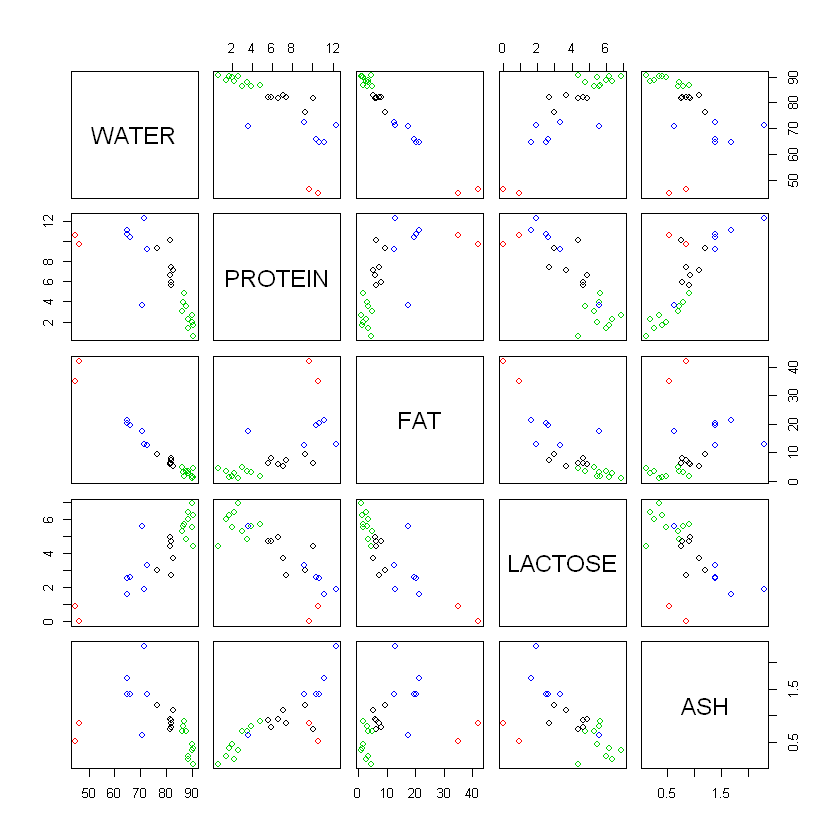

In [189]:
cl_i<-kmeans(datos,ki,iter.max=1000,nstart=10)
pairs(datos,col=cl_i$cluster)


Con K = 4 como nº ideal de clusters, notamos que los 4 grupos están bien diferenciados entre las variables porcentaje de agua y grasa, y porcentaje de agua y lactosa, donde la primera relación es inversa mientras que la segunda es directa.

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5 
1.96946572 0.94201777 0.35905327 0.31397620 0.07941651 

 5  variables and  25 observations.


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
0.02253818,0.4485425,0.240092595,-0.21444910,0.006758595
-3.83108138,-2.2408320,0.097900012,-0.02910750,-0.029457957
1.87606405,-0.2017241,-0.007713097,0.09635908,-0.003291286
-1.87604083,0.5598512,-0.299886203,0.09929465,0.007419768


K-means clustering with 4 clusters of sizes 7, 2, 10, 6

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE       ASH
1 81.18571  7.428571  6.90000 4.014286 0.9314286
2 45.65000 10.150000 38.45000 0.450000 0.6900000
3 88.50000  2.570000  2.80000 5.680000 0.4850000
4 68.33333  9.550000 17.41667 2.916667 1.4716667

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         3          3          3          3          3          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          3          3          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          1          1          4          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2 

Within cluster sum of squares by cluster:
[1]  63.53491  27.19120  59.41225 191.74708
 (between_SS / tot

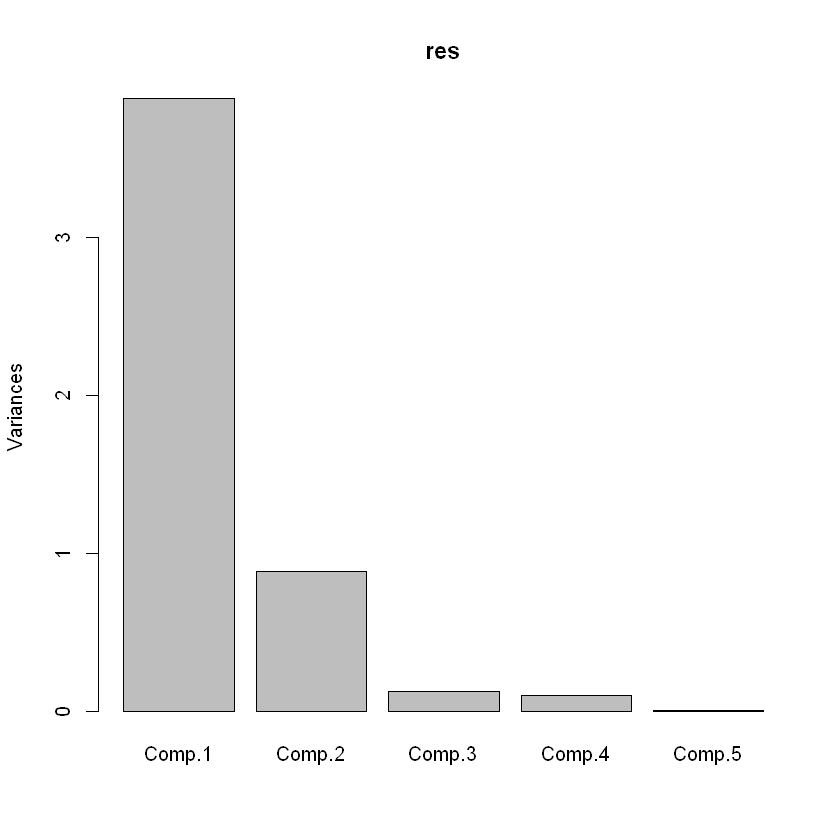

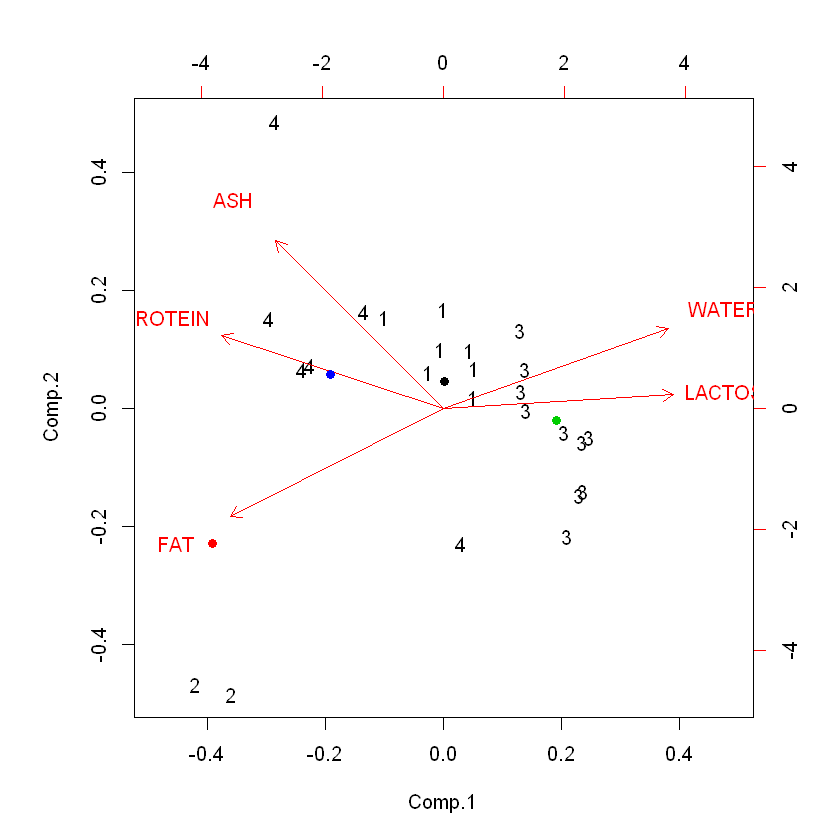

In [190]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl_i$centers)
res2
cl_i
biplot(res,xlabs=cl_i$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:ki,pch=19)

### Caracterización de datos 

In [191]:
datos$cl_num<-cl_i$cluster
datos

,WATER,PROTEIN,FAT,LACTOSE,ASH,cl_num
HORSE,90.1,2.6,1.0,6.9,0.35,3
ORANGUTAN,88.5,1.4,3.5,6.0,0.24,3
MONKEY,88.4,2.2,2.7,6.4,0.18,3
DONKEY,90.3,1.7,1.4,6.2,0.40,3
HIPPO,90.4,0.6,4.5,4.4,0.10,3
CAMEL,87.7,3.5,3.4,4.8,0.71,3
BISON,86.9,4.8,1.7,5.7,0.90,3
BUFFALO,82.1,5.9,7.9,4.7,0.78,1
GUINEA_PIG,81.9,7.4,7.2,2.7,0.85,1
CAT,81.6,10.1,6.3,4.4,0.75,1


In [192]:
tapply(datos$WATER, datos$cl_num, mean)      #tapply(X, INDEX, FUN = NULL, …, default = NA, simplify = TRUE)
tapply(datos$PROTEIN, datos$cl_num, mean)    #X, INDEX vectores del mismo largo, FUN función a aplicars
tapply(datos$FAT, datos$cl_num, mean)
tapply(datos$LACTOSE, datos$cl_num, mean)
tapply(datos$ASH, datos$cl_num, mean)

1        2        3        4 
81.18571 45.65000 88.50000 68.33333

1         2         3         4 
 7.428571 10.150000  2.570000  9.550000

1        2        3        4 
 6.90000 38.45000  2.80000 17.41667

1        2        3        4 
4.014286 0.450000 5.680000 2.916667

1         2         3         4 
0.9314286 0.6900000 0.4850000 1.4716667

In [195]:
set.seed(1)
tapply(datos$WATER, datos$cl_num, var)
tapply(datos$PROTEIN, datos$cl_num, var)
tapply(datos$FAT, datos$cl_num, var)
tapply(datos$LACTOSE, datos$cl_num, var)
tapply(datos$ASH, datos$cl_num, var)

1         2         3         4 
 4.804762  1.125000  2.684444 12.530667

1        2        3        4 
2.852381 0.405000 1.584556 9.507000

1         2         3         4 
 2.116667 25.205000  1.702222 13.941667

1         2         3         4 
0.7880952 0.4050000 0.5528889 2.0776667

1          2          3          4 
0.02724762 0.05120000 0.07725000 0.29241667

### ------- -------- ------- ------- -------  

**Ejercicio 2:** Realice un análisis de clustering con el conjunto de datos comunas.csv. 
1. Describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento
2. Utilice k-means para realizar el clustering de los datos y calcule el K óptimo. 
3. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados


**Respuesta 2.1**

In [133]:
datos <- read.csv("comunas.csv",header=TRUE,sep=";",dec=".")

In [134]:
dim(datos)
datos1 <- as.matrix(datos[1:323,3:14])
row.names(datos1) = datos[,1]
datos2 <- matrix(as.numeric(datos1),ncol=12,nrow=323,byrow=FALSE)
summary(datos2)

[1] 323  14

       V1               V2               V3               V4       
 Min.   :  2.10   Min.   :0.2350   Min.   :  89.2   Min.   : 1.30  
 1st Qu.: 10.25   1st Qu.:0.4655   1st Qu.: 127.9   1st Qu.:10.80  
 Median : 19.20   Median :0.5440   Median : 155.1   Median :15.10  
 Mean   : 52.30   Mean   :0.5444   Mean   : 176.9   Mean   :16.34  
 3rd Qu.: 55.55   3rd Qu.:0.6200   3rd Qu.: 191.5   3rd Qu.:21.00  
 Max.   :735.40   Max.   :0.9920   Max.   :1143.1   Max.   :39.50  
       V5               V6              V7               V8       
 Min.   : 6.400   Min.   :49.00   Min.   : 23.60   Min.   :68.10  
 1st Qu.: 8.100   1st Qu.:73.90   1st Qu.: 69.60   1st Qu.:75.10  
 Median : 9.000   Median :80.80   Median : 82.90   Median :76.40  
 Mean   : 9.093   Mean   :79.55   Mean   : 80.03   Mean   :76.22  
 3rd Qu.: 9.900   3rd Qu.:86.05   3rd Qu.: 93.65   3rd Qu.:77.50  
 Max.   :15.000   Max.   :98.00   Max.   :100.00   Max.   :82.20  
       V9              V10              V11            

### **Descripción de los datos y porque realizar un análisis de agrupamiento**


Estos datos se tratan de las caracterizticas socio-economicas y de salud que presental 323 comunas de chile donde consideraremos 12 caracterizticas: **Porcentaje de pobreza, Porcentaje de material de vivienda bueno o malo, Porcentaje de alcantarillado o fosa septica , Porcentaje de defuncion para personas mayores a 50 años, Poblacion en miles de años, Ingreso Mensual por persona(miles $), Tasa de AVVP x1000 horas, Mortalidad infantil X1000 NV, IDSE, Escolaridad, Indice de desarrollo Humano, Esperanza de vida al nacer** . Debido a los distintos tipos de datos que presenta este conjunto, lo dividiremos en partes para realizar una correcta comparacion.

**Conjunto 1 (Porcentaje de pobreza, Porcentaje de material de vivienda bueno o malo, Porcentaje de alcantarillado o fosa septica , Porcentaje de defuncion para personas mayores a 50 años)**

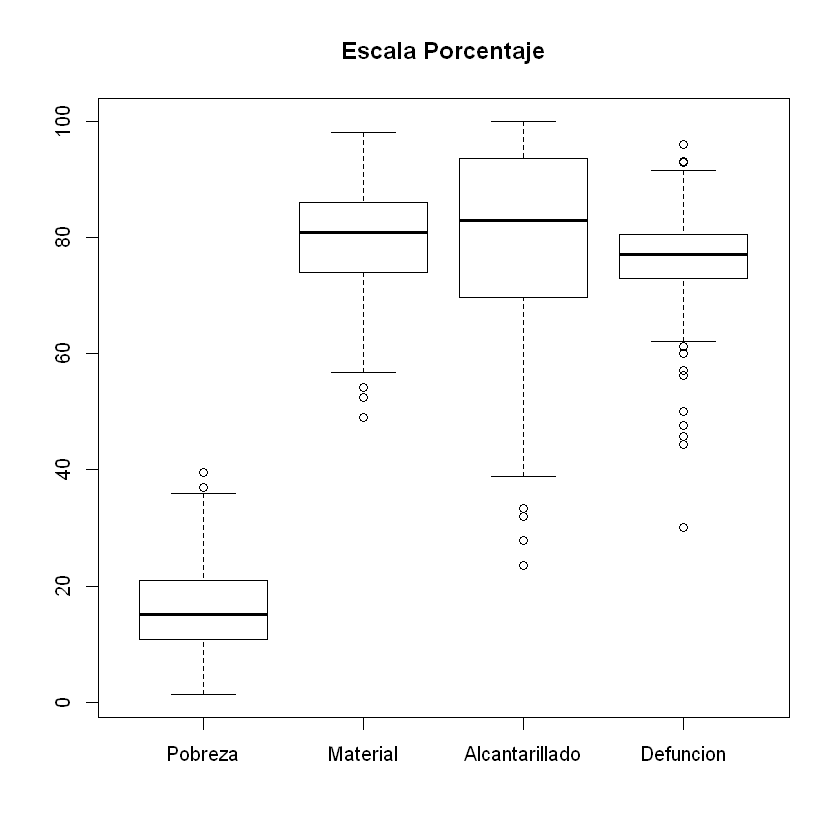

In [135]:
conjunto1 <- datos2[, c(4,6,7,11)]
colnames(conjunto1) <- c('Pobreza','Material','Alcantarillado','Defuncion')
row.names(conjunto1) <- datos[,2]
boxplot(conjunto1, main = 'Escala Porcentaje')

De este boxplot podemos ver que en promedio el mayor porcentaje de los datos socio-economicos y de salud es el alcantarillado (entre 70 y 90 % aprox), seguido por el material de vivienda bueno o malo y defuncion con un porcentaje cercano al 80% y bastante mas abajo el porcentaje de pobreza cercano a 18 %. Ademas tambien podemos ver que las componentes que tienen mayor variacion son el porcentaje de alcantarillado seguido del porcentaje de material y pobreza. por lo que resultaria pertinente realizar un analisis de agrupamiento para distinguir grupos de comunas que poseean caracteristicas similares.

**Conjunto 2 (Poblacion en miles de años, Ingreso Mensual por persona(miles $), Tasa de AVVP x1000 horas, Mortalidad infantil X1000 NV**

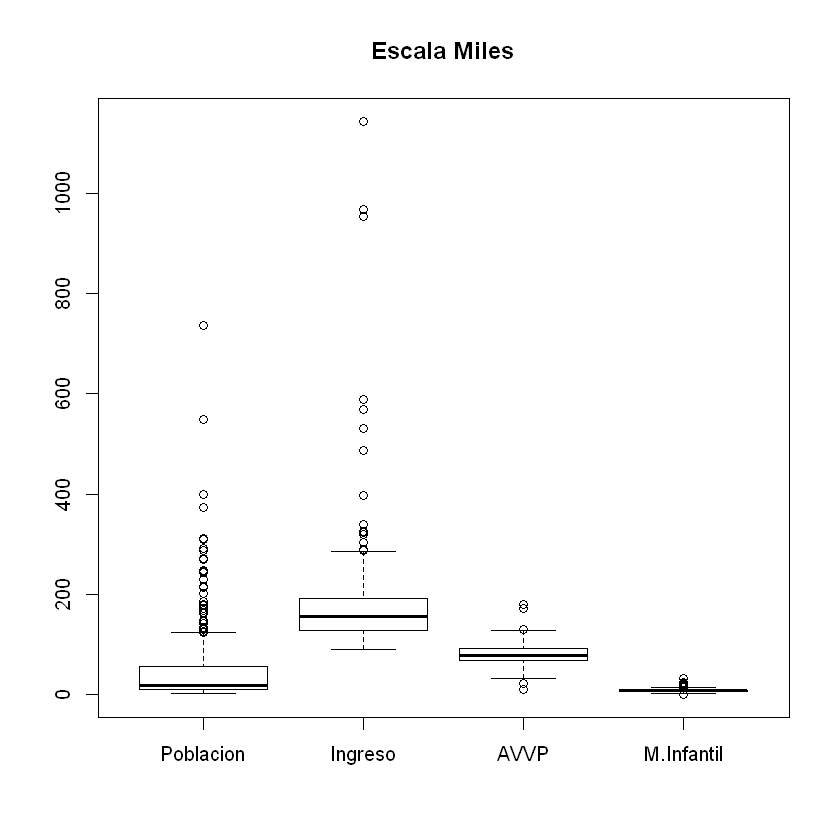

In [136]:
conjunto2 <- datos2[, c(1,3,10,12)]
colnames(conjunto2) <- c('Poblacion','Ingreso','AVVP','M.Infantil')
row.names(conjunto2) <- datos[,2]
boxplot(conjunto2, main = 'Escala Miles')

De este boxplot podemos ver que que en promedio el mayor valor en miles de los datos socio-economicos y de salud en las comunas de chile es el ingreso con un valor de 170 mil aproximado seguido por AVVP con un valor cercaco a 80 miles de horas y con un valor menor tenemos a la poblacion y la mortalidad infantil. tambien podemos ver que las componentes que tienen mayor variacion son el ingreso y  la poblacion, por lo cual resultaria pertinente realizar un analisis de agrupamiento para distinguir grupos de comunas que posean caracteristicas socio-economicas y de salud similares.

**Conjunto 3 (IDSE, Escolaridad, Indice de desarrollo Humano, Esperanza de vida al nacer)**

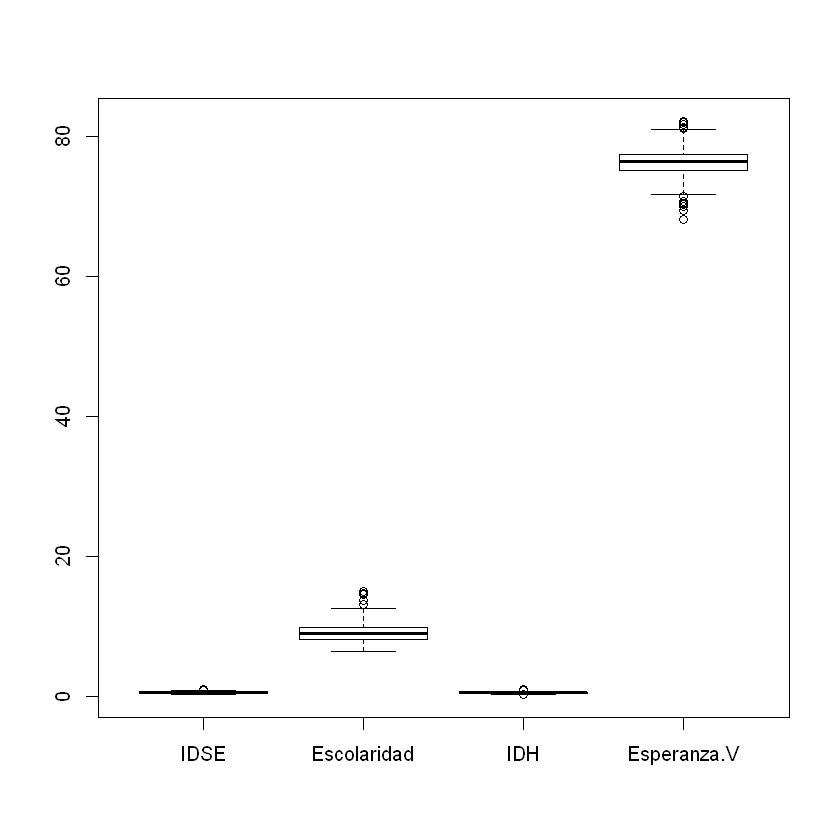

In [137]:
conjunto3 <- datos2[, c(2,5,9,8)]
colnames(conjunto3) <- c('IDSE','Escolaridad','IDH','Esperanza.V')
row.names(conjunto3) <- datos[,2]
boxplot(conjunto3)

De este boxplot podemos ver que en promedio el mayor valor de los datos socioeconomicos y de salud en las comunas de chile es la esperanza de vida al nacer con un valor aproximado de 70, seguido por la escolaridad con un valor cercano a 10, y bastante mas abajo se encontraria el IDSE e IDH. tambien podemos ver que las componentes que tienen mayor variacion son la esperanza de vida al nacer y la escolaridad, porl o que resultaria pertinente realizar un analisis de agrupamiento para distinguir grupos de comunas que posean caracteristicas socio-economicas y de salud similares

**Respuesta 2.2**

**Conjunto 1**

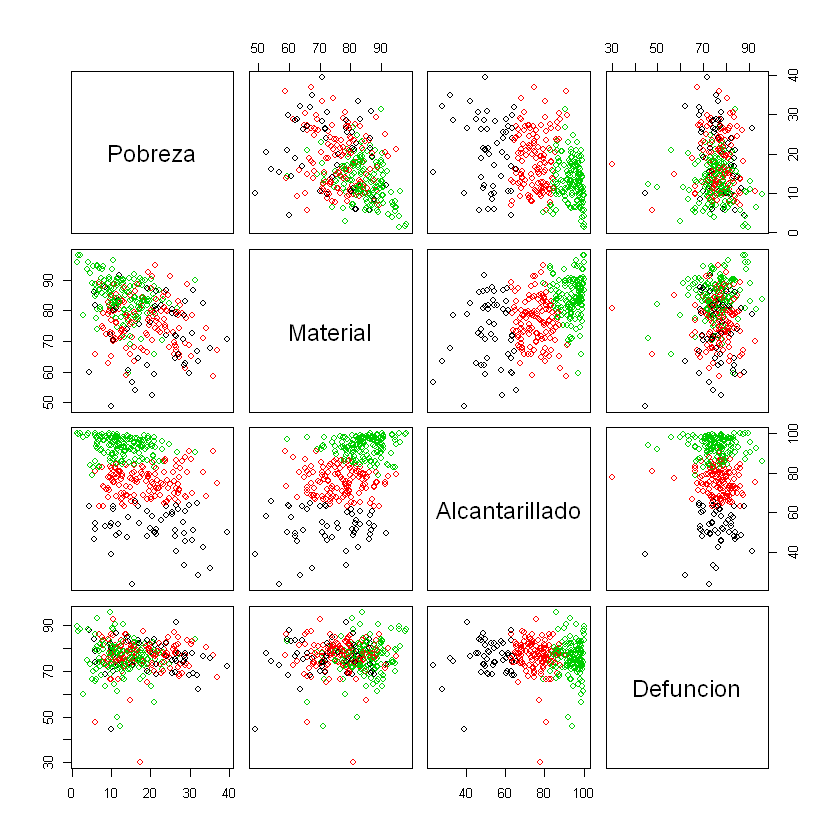

In [245]:
set.seed(1)
#ingresar valor de k0 
k0=3
cl<-kmeans(conjunto1,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(conjunto1,col=cl$cluster)

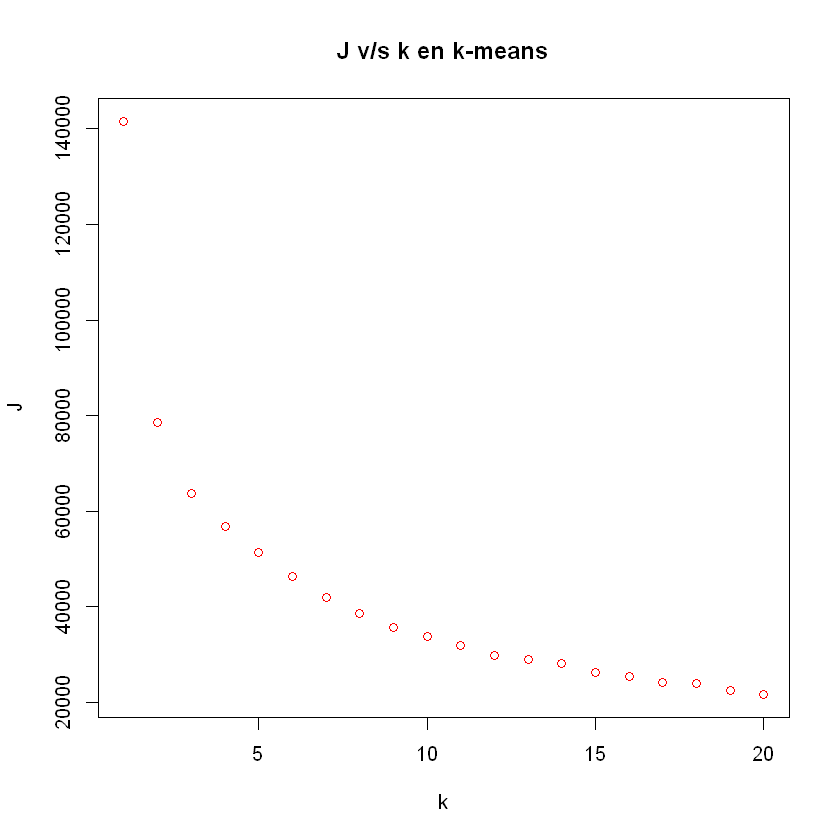

In [246]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(conjunto1,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

Del grafico anterior podemos ver que un K optimo podria ser **7** 

**Conjunto 2**

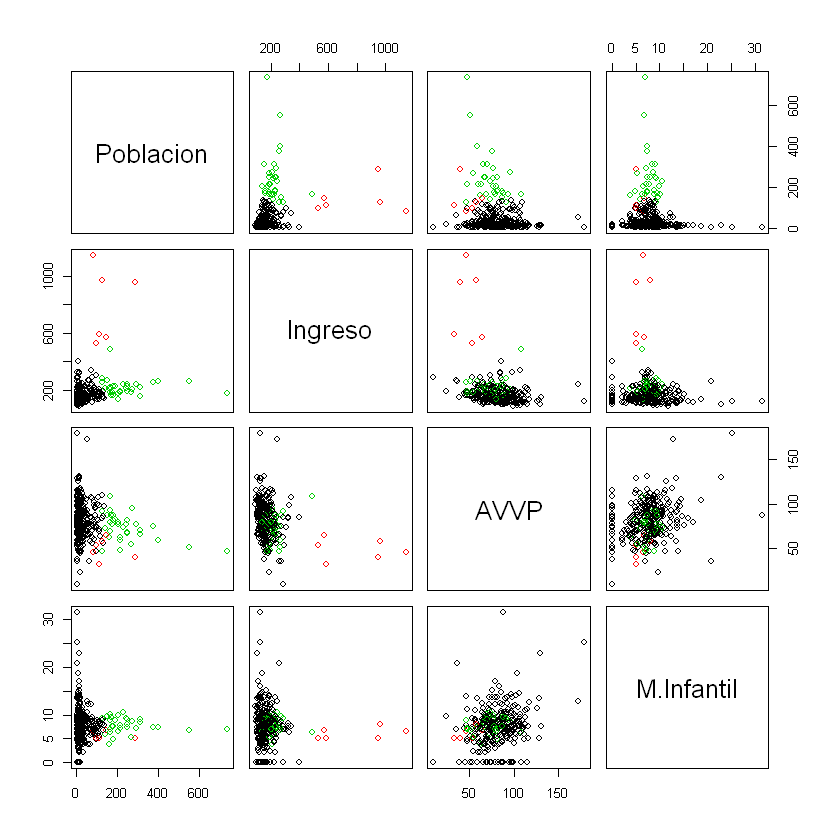

In [233]:
set.seed(2)
#ingresar valor de k0 
k0=3
cl<-kmeans(conjunto2,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(conjunto2,col=cl$cluster)

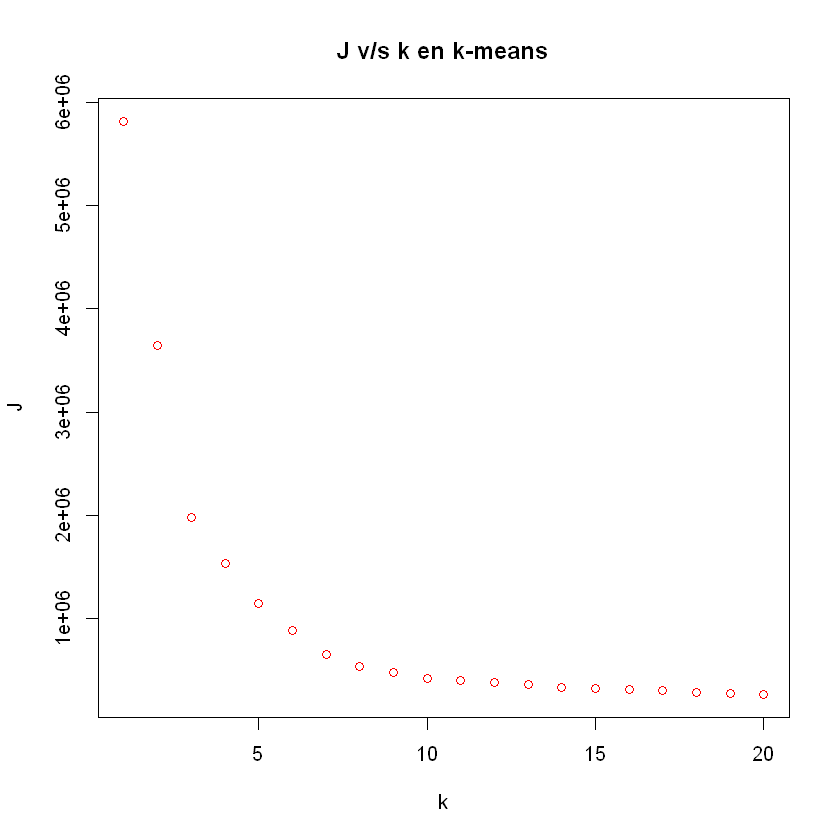

In [234]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(conjunto2,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

Del grafico anterior podemos ver que un K optimo podria ser **7** 

**Conjunto 3**

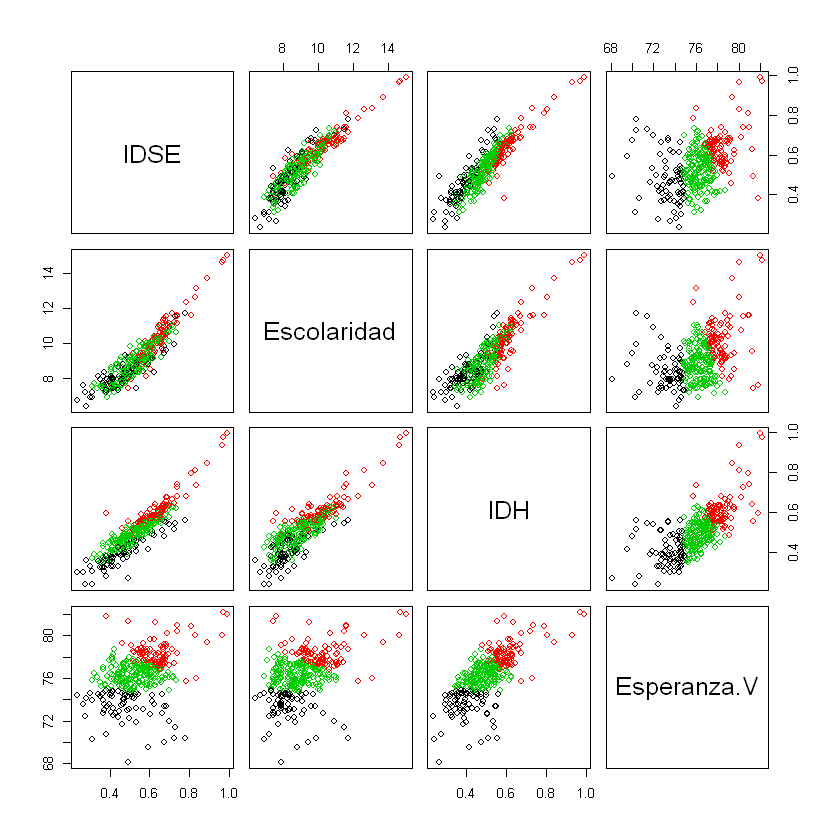

In [229]:
set.seed(3)
#ingresar valor de k0 
k0=3
cl<-kmeans(conjunto3,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(conjunto3,col=cl$cluster)

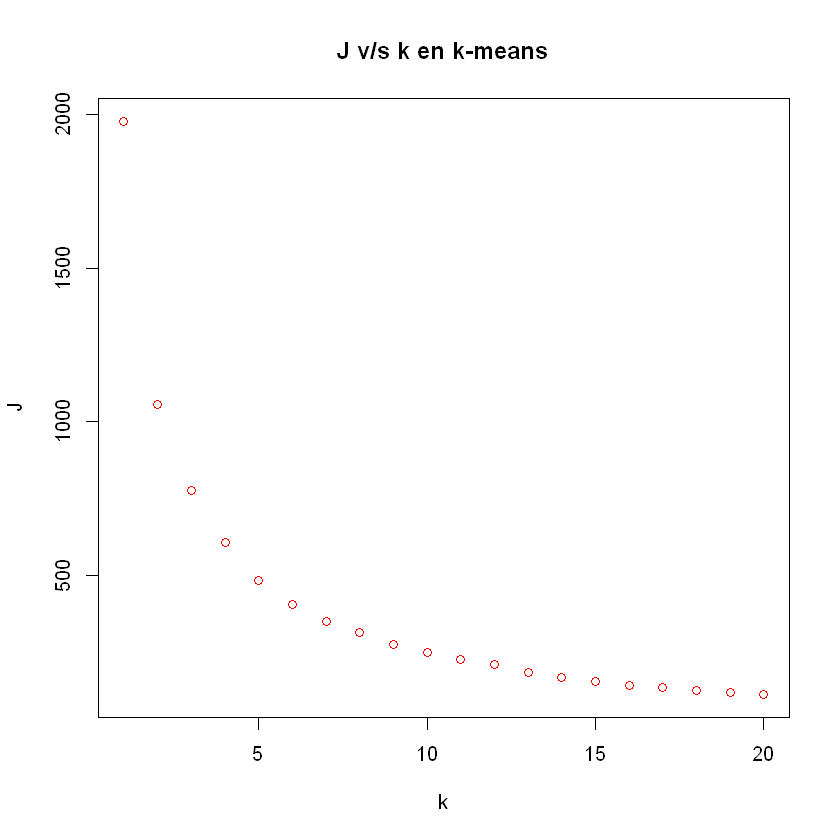

In [230]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(conjunto3,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

Del grafico anterior podemos ver que un K optimo podria ser **7** 

**Respuesta 2.3**

## Resultados con el k optimo 7

**Conjunto 1**

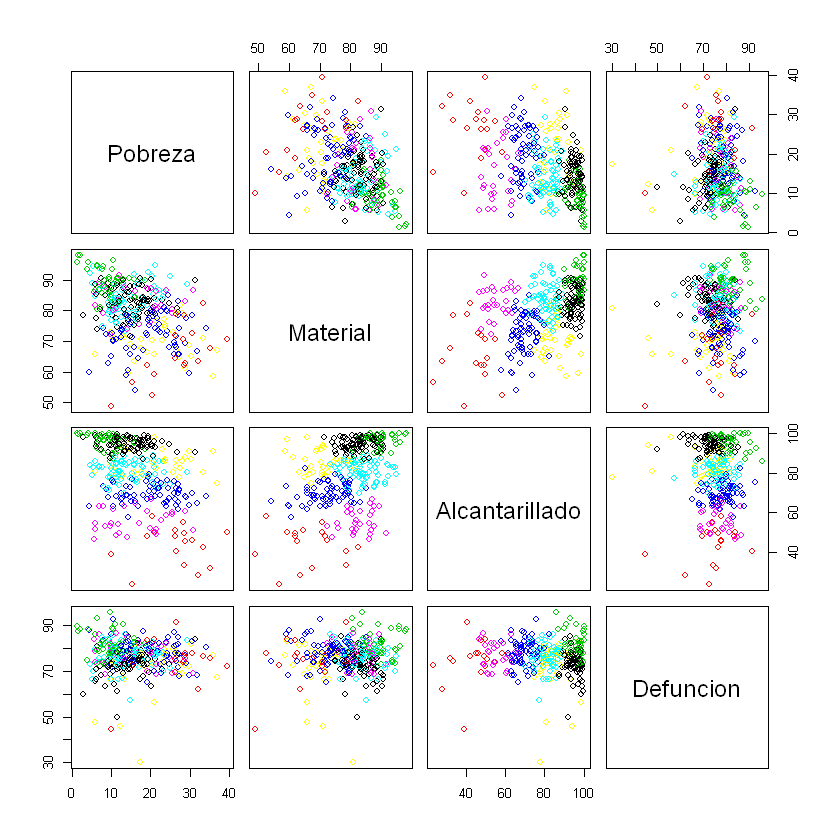

In [252]:
set.seed(1)
#ingresar valor de k0 
k_op = 7
cl<-kmeans(conjunto1,k_op,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(conjunto1,col=cl$cluster)

Call:
princomp(x = conjunto1, cor = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4 
1.3410293 1.0043663 0.8029506 0.7403777 

 4  variables and  323 observations.


Comp.1,Comp.2,Comp.3,Comp.4
-0.8574953,-0.54650428,0.28478386,0.34378435
3.0096527,0.07949402,-0.32464204,-0.57940004
-1.8191118,0.70420692,0.06152012,0.05180749
1.1027071,0.35588873,-0.19193920,0.16885061
-0.4914783,0.04262995,-0.01631692,-0.30956152
0.6390506,0.40676911,-0.40690786,-1.32783003
0.8461582,-0.80043145,0.21001482,0.87795366


K-means clustering with 7 clusters of sizes 74, 17, 40, 65, 66, 28, 33

Cluster means:
   Pobreza Material Alcantarillado Defuncion
1 14.66486 82.73514       94.97162  73.24324
2 26.42353 66.22353       43.41176  74.51765
3  9.38500 89.28750       95.99750  82.29500
4 19.78308 72.29231       69.66769  78.39846
5 14.11364 83.90606       80.88030  76.43485
6 15.96429 82.82857       55.63214  77.17143
7 21.36061 70.29697       85.46061  71.17879

Clustering vector:
             Iquique                 Pica         Pozo Almonte 
                   1                    7                    7 
       Alto Hospicio                Huara               Calama 
                   7                    2                    1 
         Antofagasta          Marða Elena           Mejillones 
                   1                    1                    1 
        Sierra Gorda               Taltal            Tocopilla 
                   1                    1                    1 
San Pedro de Atacama 

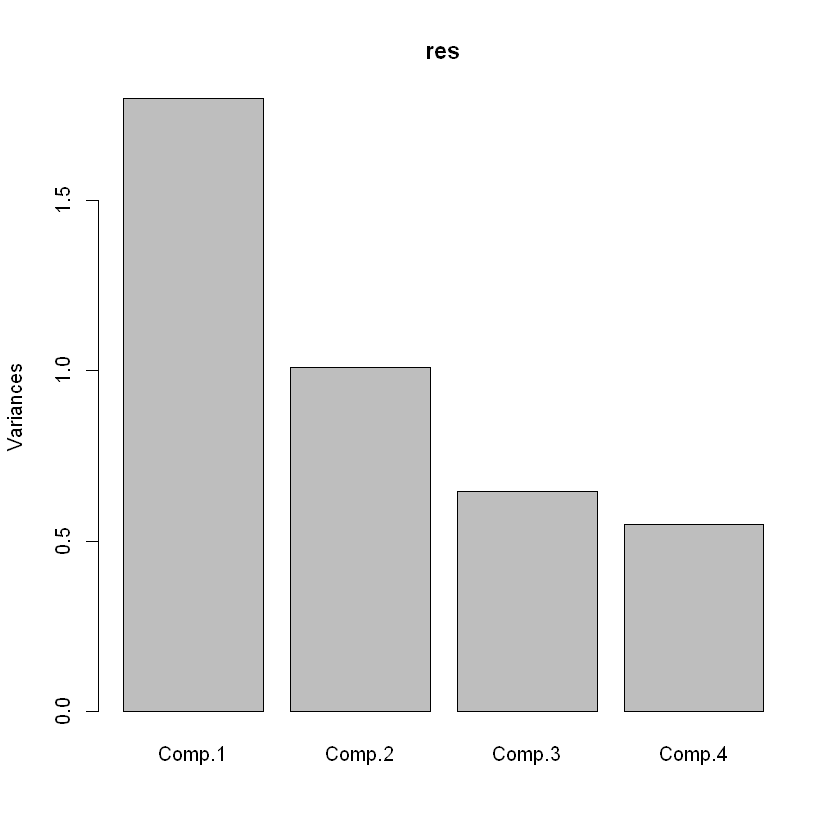

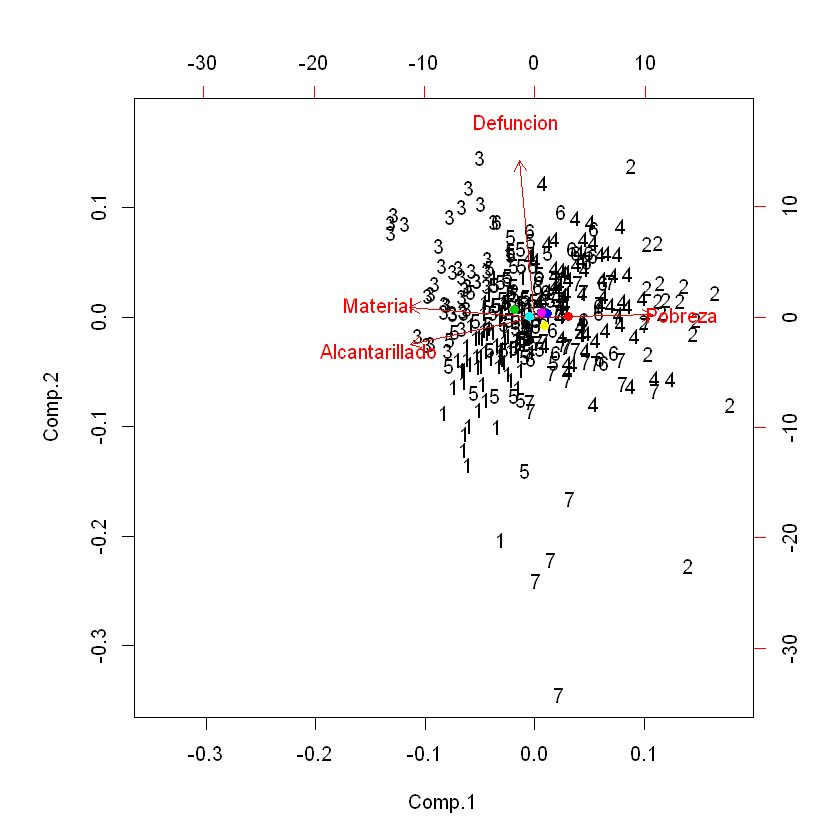

In [254]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(conjunto1, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k_op,pch=19)


**Conjunto 2**

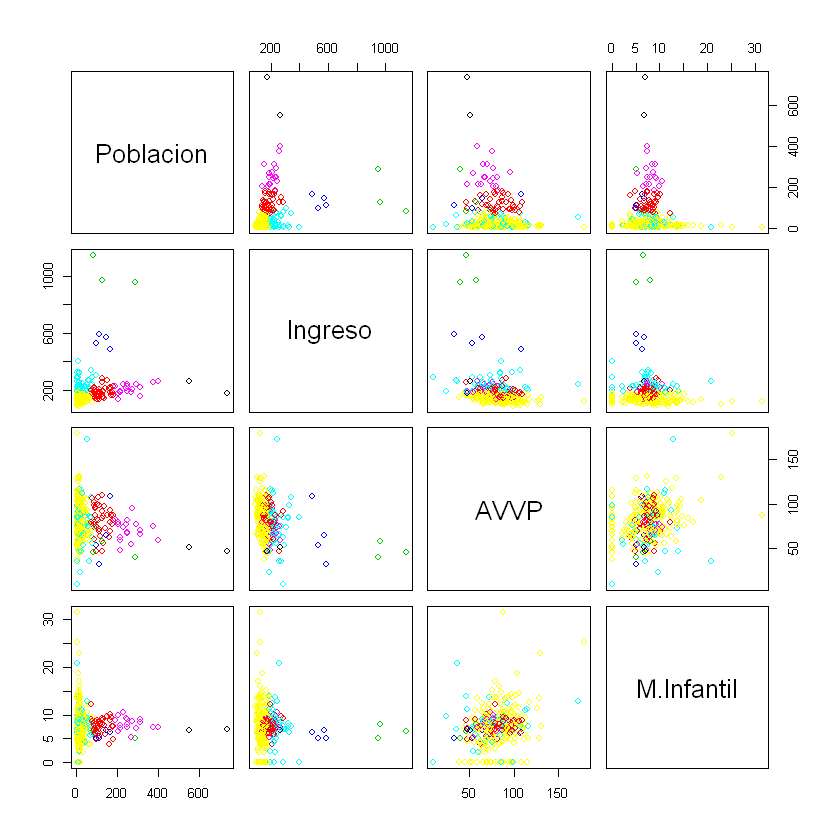

In [255]:
set.seed(2)
#ingresar valor de k0 
k_op = 7
cl<-kmeans(conjunto2,k_op,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(conjunto2,col=cl$cluster)

Call:
princomp(x = conjunto2, cor = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4 
1.2514958 1.0303767 0.8461122 0.8100471 

 4  variables and  323 observations.


Comp.1,Comp.2,Comp.3,Comp.4
4.6636854,3.11713494,4.66734643,1.03566948
0.3835304,0.44171797,0.53533731,-0.07991926
6.2035293,2.62486059,-3.94200297,-3.04048573
3.0243083,1.00923614,-1.37506363,-1.42915128
0.2852008,-0.01037758,-0.61901557,-0.12971495
1.6291366,1.29297440,1.51087966,0.31359150
-0.4803928,-0.28431638,-0.04692707,0.08157570


K-means clustering with 7 clusters of sizes 2, 40, 3, 4, 50, 18, 206

Cluster means:
  Poblacion   Ingreso     AVVP M.Infantil
1 642.10000  217.9500 48.90000   6.900000
2 116.87750  186.1050 81.66500   7.700000
3 164.76667 1020.9333 47.63333   6.566667
4 128.55000  543.8000 64.50000   5.775000
5  26.32000  236.9340 75.58400   7.812000
6 259.45000  207.7444 70.45000   8.083333
7  19.12233  137.9757 82.69320   7.700000

Clustering vector:
             Iquique                 Pica         Pozo Almonte 
                   6                    5                    7 
       Alto Hospicio                Huara               Calama 
                   2                    7                    2 
         Antofagasta          Marða Elena           Mejillones 
                   6                    5                    5 
        Sierra Gorda               Taltal            Tocopilla 
                   5                    5                    5 
San Pedro de Atacama     Diego de Almagro      

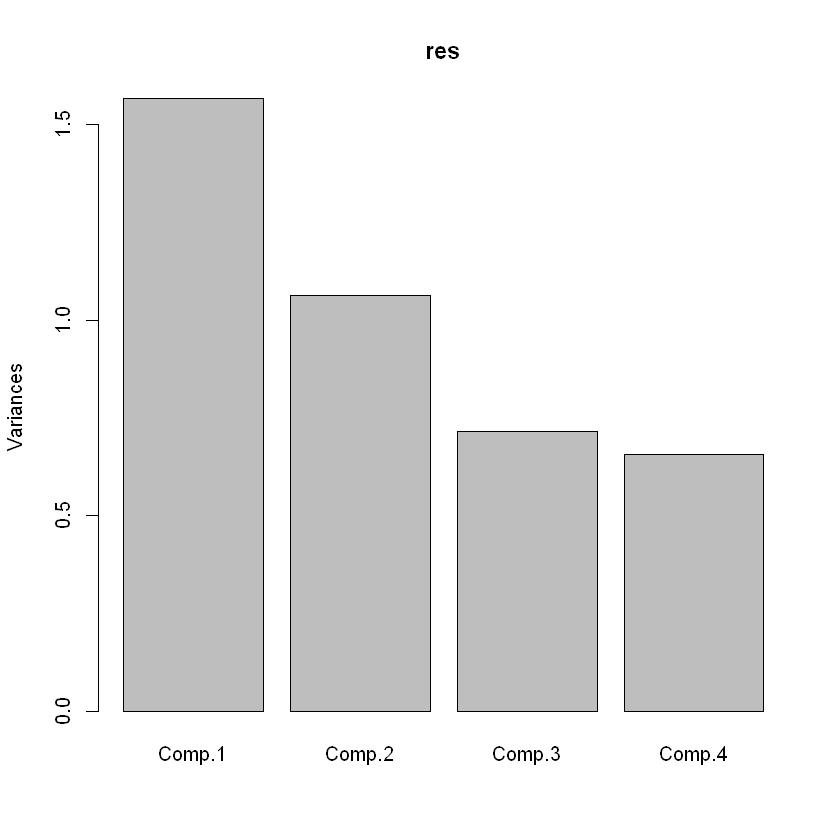

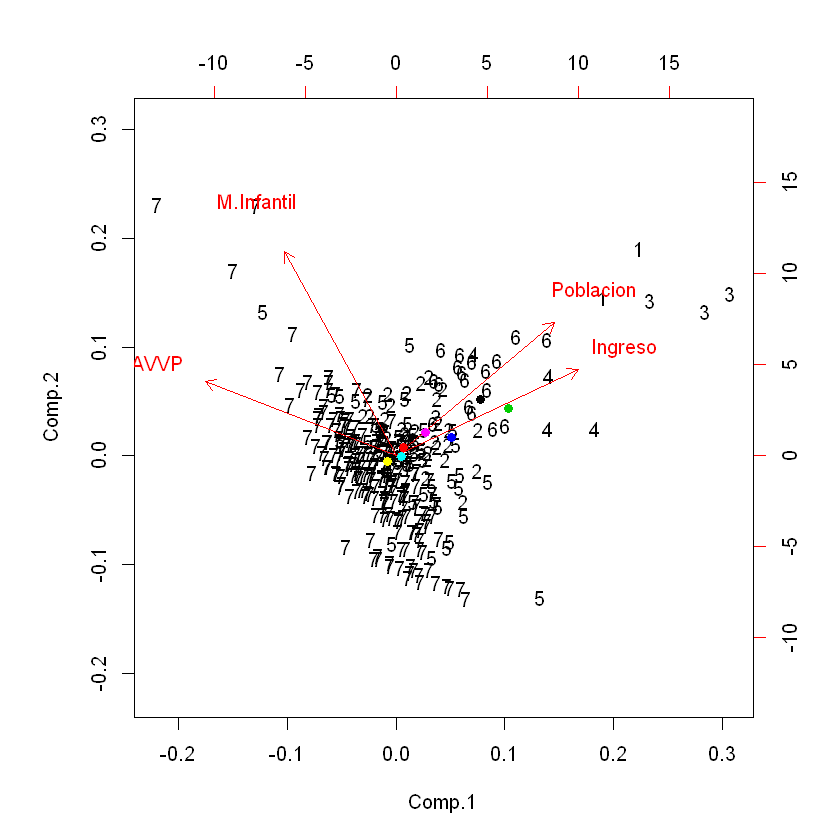

In [256]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(conjunto2, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k_op,pch=19)

**Conjunto 3**

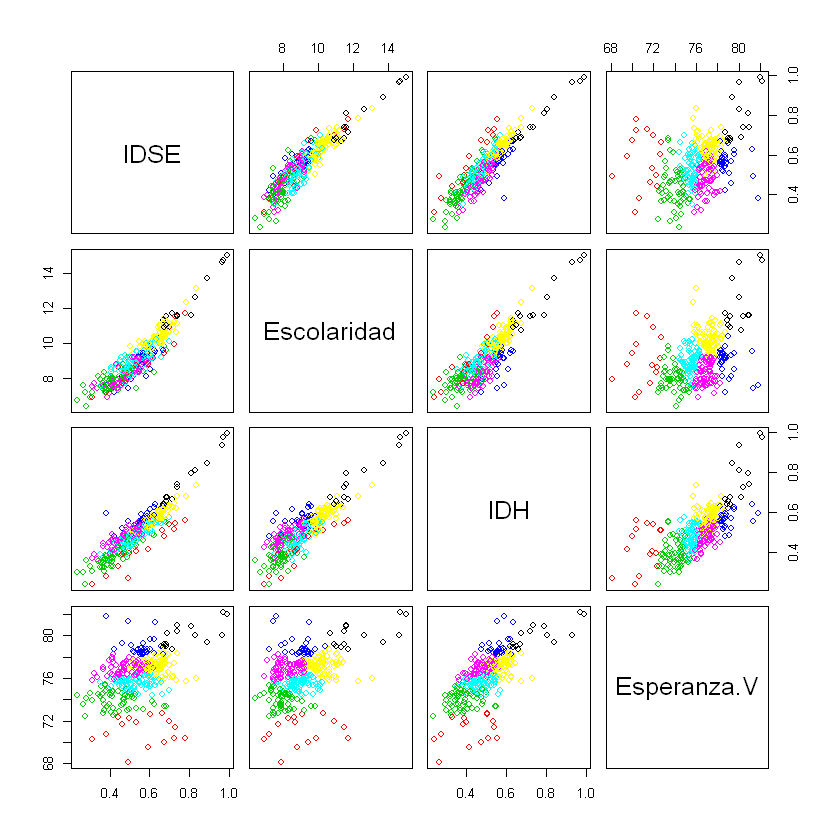

In [257]:
set.seed(3)
#ingresar valor de k0 
k_op = 7
cl<-kmeans(conjunto3,k_op,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(conjunto3,col=cl$cluster)

Call:
princomp(x = conjunto3, cor = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4 
1.7733808 0.8590842 0.3091148 0.1467754 

 4  variables and  323 observations.


Comp.1,Comp.2,Comp.3,Comp.4
4.4607378,-0.1975674,-0.23267662,-0.13662248
-1.2037014,2.2801880,0.17449081,-0.05332586
-1.9828083,0.3677806,-0.02302356,-0.04425116
0.8161156,-1.1688773,0.16967365,0.04901353
-0.4195383,0.2330662,-0.04423258,0.02461284
-0.6007136,-0.6845650,0.13181352,-0.01129878
1.4820107,0.1493019,-0.11577311,0.03788429


K-means clustering with 7 clusters of sizes 14, 15, 56, 29, 68, 66, 75

Cluster means:
       IDSE Escolaridad       IDH Esperanza.V
1 0.7895714   12.314286 0.7666429    80.07857
2 0.5728667    9.126667 0.4236667    71.08000
3 0.4328571    7.925000 0.3859286    73.97679
4 0.5581034    8.944828 0.5636207    78.94828
5 0.5276471    8.954412 0.4724118    75.50147
6 0.4845909    8.234848 0.4796364    76.93333
7 0.6388000   10.294667 0.5805200    77.18133

Clustering vector:
             Iquique                 Pica         Pozo Almonte 
                   7                    7                    7 
       Alto Hospicio                Huara               Calama 
                   7                    4                    7 
         Antofagasta          Marða Elena           Mejillones 
                   7                    2                    5 
        Sierra Gorda               Taltal            Tocopilla 
                   3                    3                    2 
San Pedro de 

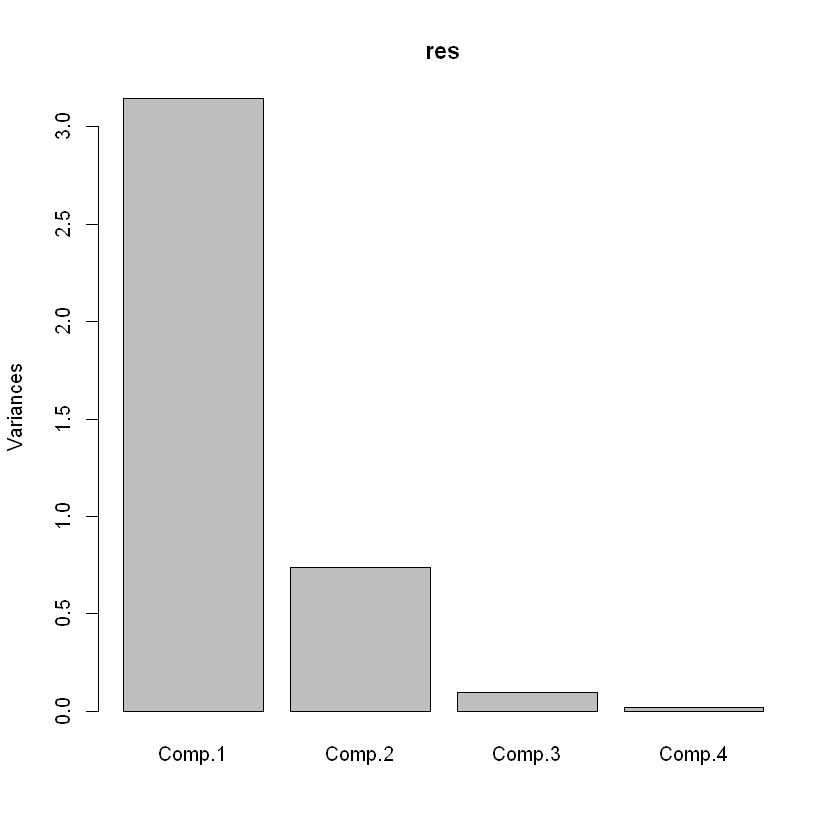

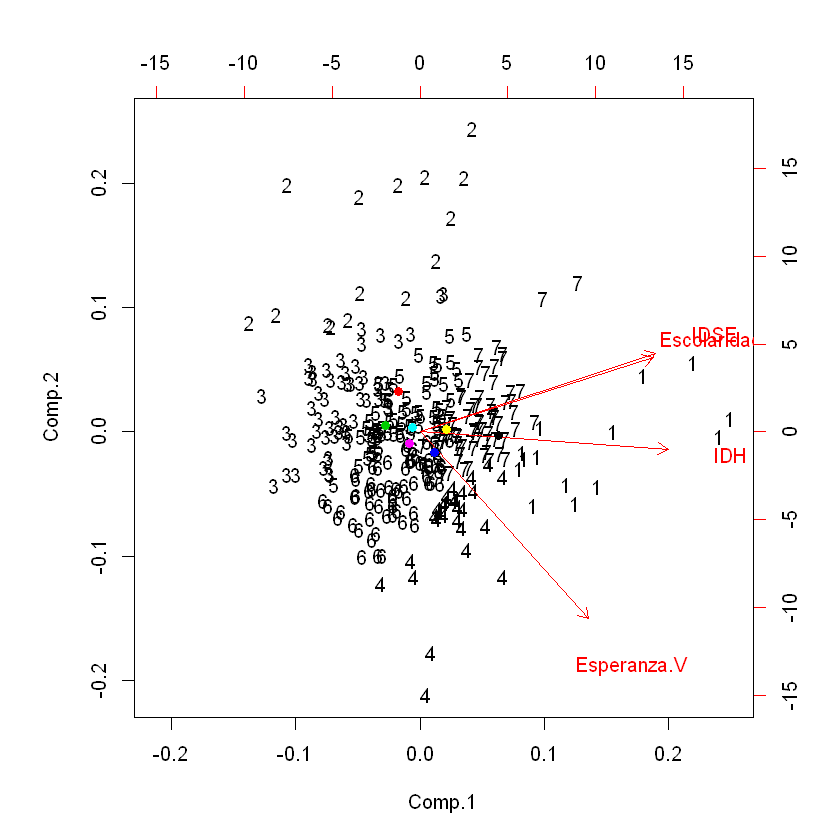

In [258]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(conjunto3, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k_op,pch=19)

## Caracterizacion de los grupos

EXTRA

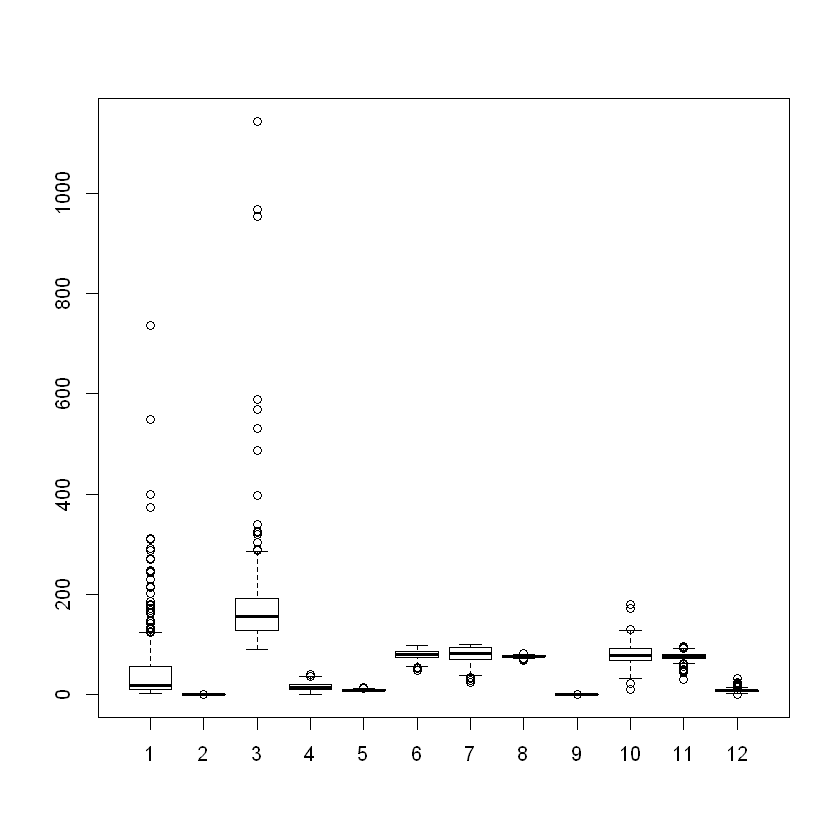

In [196]:
boxplot(datos2)

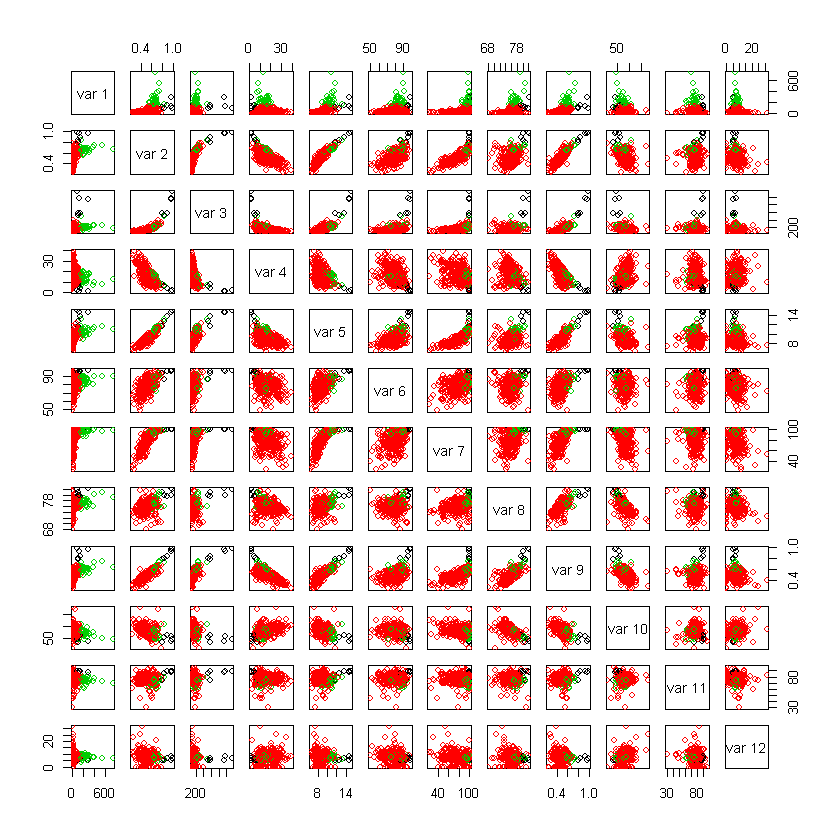

In [197]:
set.seed(3)
#ingresar valor de k0 
k0=3
cl<-kmeans(datos2,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos2,col=cl$cluster)

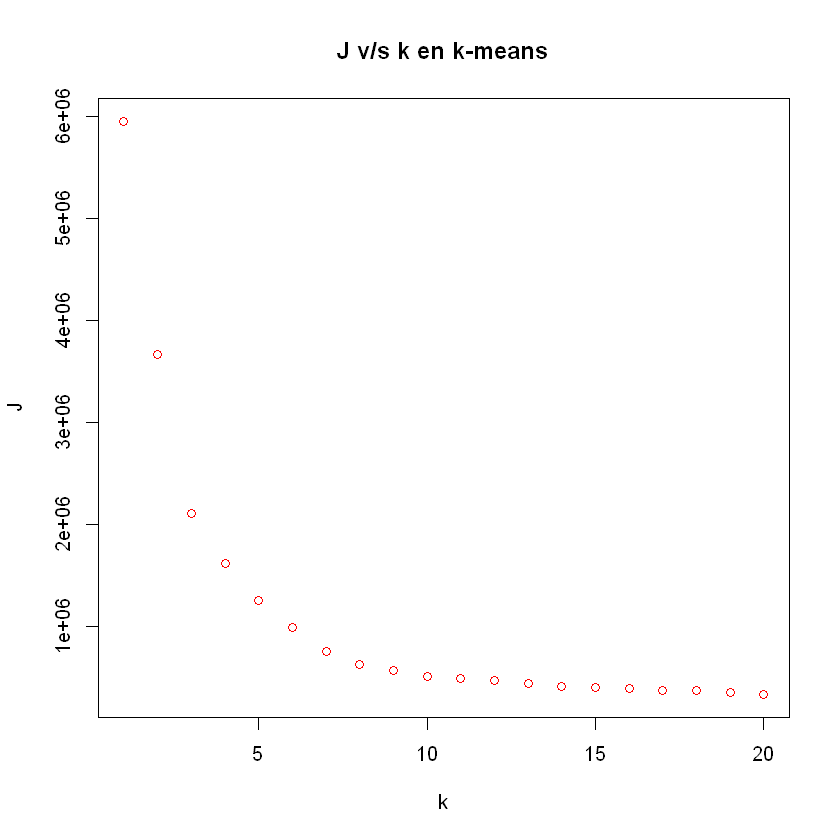

In [260]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos2,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

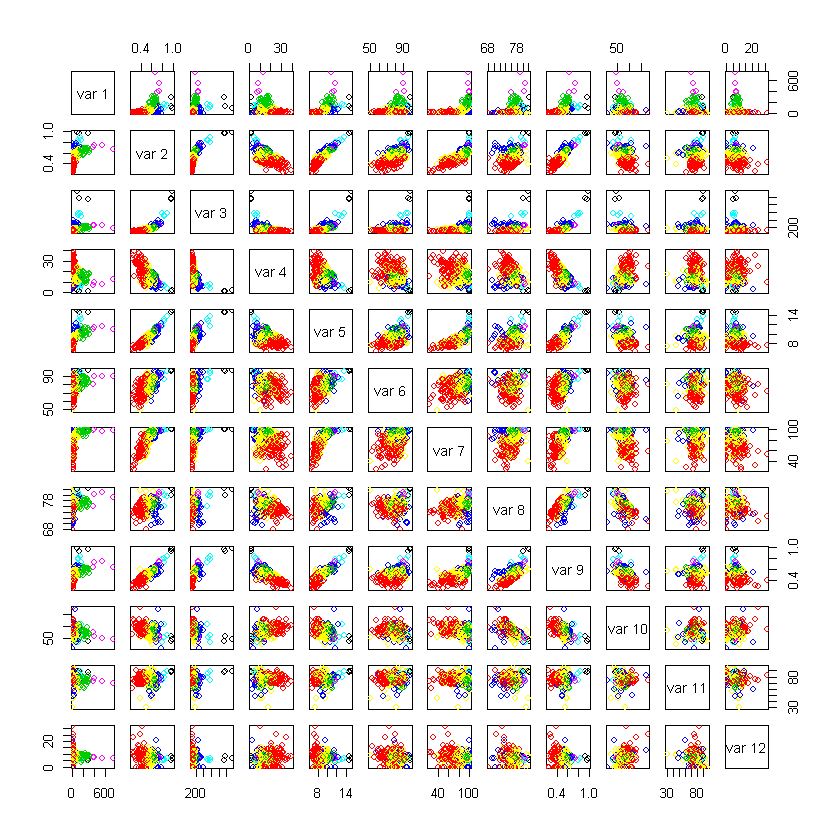

In [261]:
set.seed(3)
#ingresar valor de k0 
k0=7
cl<-kmeans(datos2,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos2,col=cl$cluster)

Call:
princomp(x = datos2, cor = TRUE)

Standard deviations:
     Comp.1      Comp.2      Comp.3      Comp.4      Comp.5      Comp.6 
2.381911315 1.145126612 1.098105090 0.960237380 0.933282937 0.759991119 
     Comp.7      Comp.8      Comp.9     Comp.10     Comp.11     Comp.12 
0.725190107 0.686566939 0.581470855 0.315435409 0.061566504 0.004029302 

 12  variables and  323 observations.


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12
10.2741476,1.394206665,-1.39138281,-2.875087214,1.1154662,-1.83564276,3.507048906,-2.11066901,0.58659233,0.74067414,-0.225660211,-0.0027318363
-2.3065220,0.007511959,-0.07037081,-0.006899454,0.2016744,-0.07000589,0.222599633,-0.05831548,0.05258619,0.02978966,-0.020203980,0.0002187940
2.1515015,0.347739567,1.06074780,0.849873683,0.5534326,0.13566607,0.009938332,0.47978697,0.10814974,-0.03119017,0.004117500,-0.0008739491
1.7750877,0.577751607,-0.02619139,-0.230514089,-0.8932544,-0.29384920,-0.311710354,-0.05752922,0.04657247,-0.03666770,0.055643265,0.0003783979
6.2016184,0.785361249,-0.68187709,-0.945539080,0.4378196,-0.88130771,1.179204953,-0.70905392,-0.08822682,-0.10199623,0.069059015,0.0056836619
4.9104624,-0.158795804,2.43415306,1.911069591,1.8454797,0.78210358,1.294204102,2.43231247,0.90501288,0.34231594,0.016497056,0.0008045441
0.3501269,-0.337962121,-0.21163648,-0.088267576,-0.1183217,0.17420975,-0.260196785,-0.05102022,-0.12918925,-0.03208408,0.001215448,-0.0002482644


K-means clustering with 7 clusters of sizes 3, 113, 31, 42, 4, 4, 126

Cluster means:
       [,1]      [,2]      [,3]      [,4]      [,5]     [,6]     [,7]     [,8]
1 164.76667 0.9766667 1020.9333  1.666667 14.766667 97.23333 99.86667 81.40000
2  15.58761 0.4271062  121.9637 22.130973  7.974336 74.30619 66.05221 75.14248
3 199.37742 0.6443871  195.2032 15.183871 10.448387 83.93226 95.88710 77.17097
4  40.76190 0.6643333  250.9286  9.940476 10.073810 84.00238 93.05952 75.65238
5 128.55000 0.8412500  543.8000  6.125000 12.750000 90.70000 99.55000 79.07500
6 513.90000 0.7180000  238.4000  9.450000 11.250000 87.85000 98.32500 79.17500
7  33.13413 0.5598175  163.2016 14.466667  9.115873 80.65873 82.65238 76.83968
       [,9]    [,10]    [,11]    [,12]
1 0.9646667 47.63333 88.56667 6.566667
2 0.4032566 91.31327 76.89558 8.193805
3 0.5797097 76.22258 74.07097 7.938710
4 0.5753095 76.15952 73.51429 7.740476
5 0.7937500 64.50000 81.95000 5.775000
6 0.6810000 57.92500 73.15000 7.100000
7 0.52276

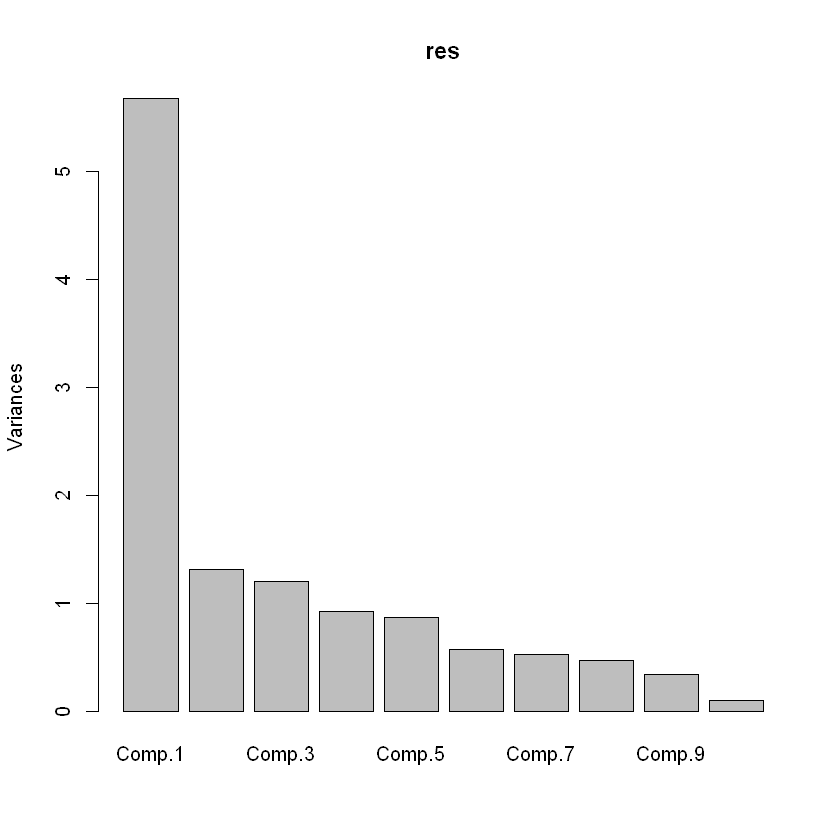

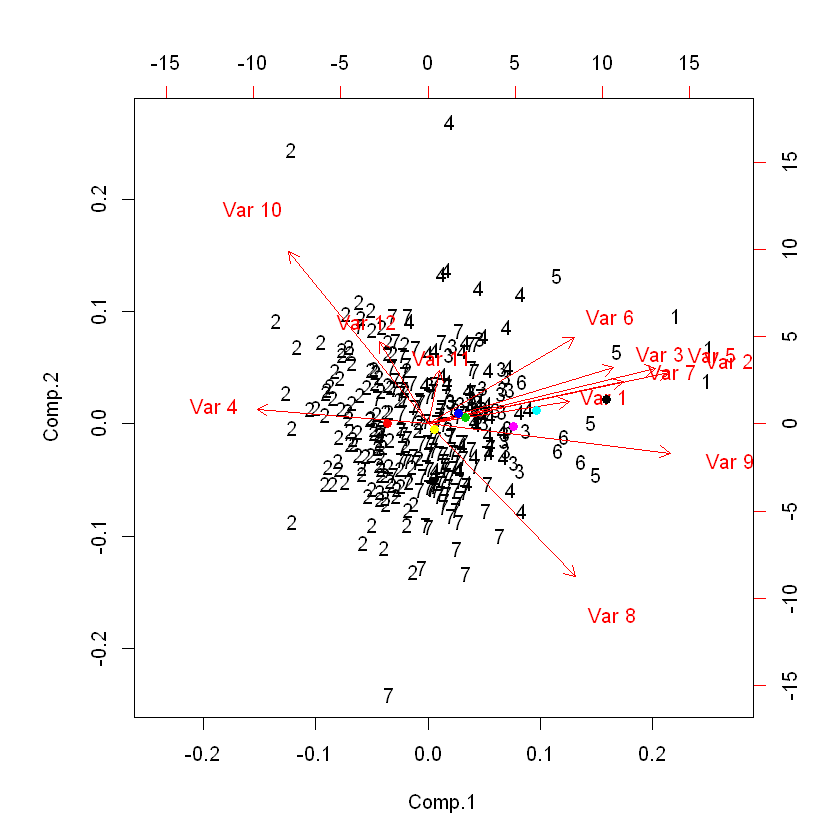

In [262]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos2, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)